# Employee Overall Performance

### Importing Packages

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### Exploratory Data Anlysis (EDA)
- Merging Dataset
- Describe Dataset
- Information Dataset
- N-Unique values in Dataset 
- Value counts in Dataset
- Null Values in Dataset
- Correlations of numerical dtypes
- Checking for the outliers
- Splitting in Features and label

### Loading Dataset

In [47]:
demographic = pd.read_csv('demographic_detail.csv')
roster_with_score = pd.read_csv("roster_with_score.csv")
df = pd.merge(roster_with_score,demographic,on='employee_id')
df = df.drop(['Unnamed: 0_x','Unnamed: 0_y','first','last','employee_id'],axis=1)

### Describe Dataset

In [48]:
df.describe()

,manager_id,tenure_id,alignment,development,enablement,engagement,leadership,overall,year_of_birth,time_on_the_job
count,380.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,373.263158,2.181102,0.780402,0.671391,0.781627,0.794646,0.823447,0.770303,1981.671916,25.488189
std,227.816779,1.197040,0.085913,0.100472,0.121302,0.069348,0.126808,0.069176,11.250496,18.178298
min,11.000000,0.000000,0.533333,0.333333,0.333333,0.600000,0.333333,0.568000,1949.000000,0.000000
25%,183.000000,2.000000,0.733333,0.600000,0.733333,0.760000,0.733333,0.736000,1976.000000,13.000000
50%,365.000000,2.000000,0.800000,0.666667,0.800000,0.800000,0.866667,0.773333,1982.000000,20.000000
75%,572.000000,3.000000,0.866667,0.733333,0.866667,0.840000,0.933333,0.813333,1989.000000,38.000000
max,756.000000,4.000000,1.000000,0.933333,1.000000,0.920000,1.000000,0.949333,2003.000000,72.000000


### Information Dataset

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381 entries, 0 to 380
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              381 non-null    object 
 1   manager_id         380 non-null    float64
 2   function           381 non-null    object 
 3   department         381 non-null    object 
 4   location           381 non-null    object 
 5   age                381 non-null    object 
 6   sex                381 non-null    object 
 7   ethnicity          381 non-null    object 
 8   employment_status  381 non-null    object 
 9   tenure             381 non-null    object 
 10  tenure_id          381 non-null    int64  
 11  alignment          381 non-null    float64
 12  development        381 non-null    float64
 13  enablement         381 non-null    float64
 14  engagement         381 non-null    float64
 15  leadership         381 non-null    float64
 16  overall            381 non

### N-Unique value in Dataset

In [50]:
df.select_dtypes(['object']).nunique()

title                59
function              8
department           36
location              5
age                   6
sex                   2
ethnicity             5
employment_status     2
tenure                5
dtype: int64

In [51]:
df.select_dtypes(['int64','float64']).nunique()

manager_id          59
tenure_id            5
alignment           10
development         12
enablement          14
engagement          11
leadership          12
overall            155
year_of_birth       51
time_on_the_job     71
dtype: int64

### Value counts In Dataset

In [52]:
df.value_counts()

title                   manager_id  function         department    location           age      sex  ethnicity  employment_status  tenure                  tenure_id  alignment  development  enablement  engagement  leadership  overall   year_of_birth  time_on_the_job
Accountant              234.0       Loan Operations  Finance       Mountain View, CA  18 - 24  M    white      Part time          2 to less than 4 years  3          0.800000   0.733333     0.866667    0.84        1.000000    0.848000  1999           35                 1
Manager of Engineering  580.0       Engineering      Full Stack    Mountain View, CA  25 - 34  M    asian      Full time          1 to less than 2 years  2          0.866667   0.733333     0.666667    0.84        0.800000    0.781333  1987           24                 1
Marketing Analyst       495.0       Finance & Admin  Marketing     New York, NY       35 - 44  F    white      Full time          2 to less than 4 years  3          0.733333   0.733333     0.8

### Null Values in Dataset

In [53]:
df.isnull().sum()

title                0
manager_id           1
function             0
department           0
location             0
age                  0
sex                  0
ethnicity            0
employment_status    0
tenure               0
tenure_id            0
alignment            0
development          0
enablement           0
engagement           0
leadership           0
overall              0
year_of_birth        0
time_on_the_job      0
dtype: int64

### Correlations of numerical dtypes

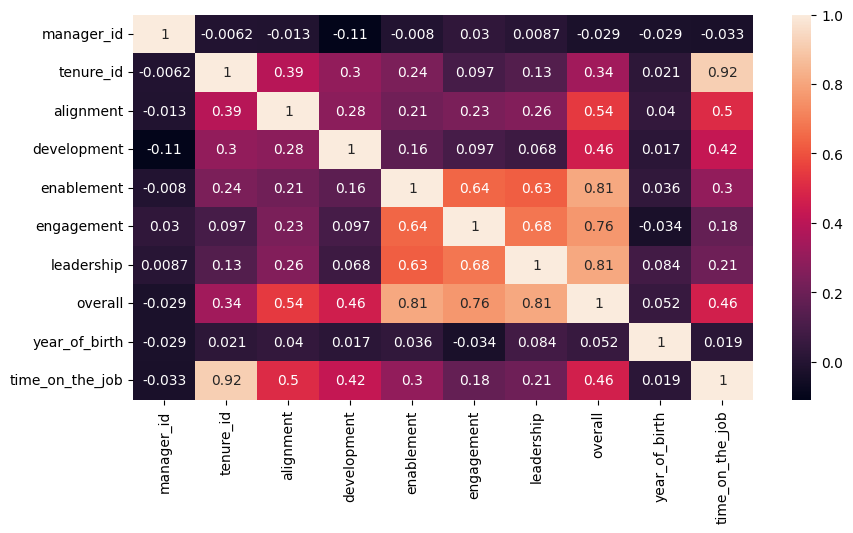

In [54]:
df_numerical = df.select_dtypes(['float64','int64'])
numerical_corr_mat = df_numerical.corr()
plt.figure(figsize=(10,5))
sns.heatmap(numerical_corr_mat,annot=True)
plt.show()

### Overall vs Engagement

Text(0.5, 1.0, 'Overall vs Engagement')

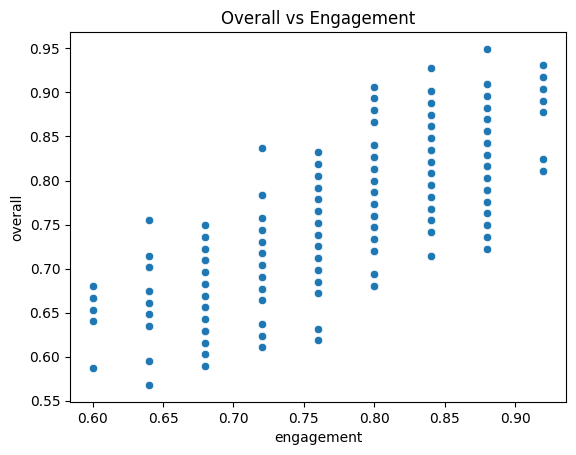

In [67]:
sns.scatterplot(data=df_numerical,x='engagement',y='overall')
plt.title('Overall vs Engagement')

### Overall vs Leadership

Text(0.5, 1.0, 'Overall vs Leadership')

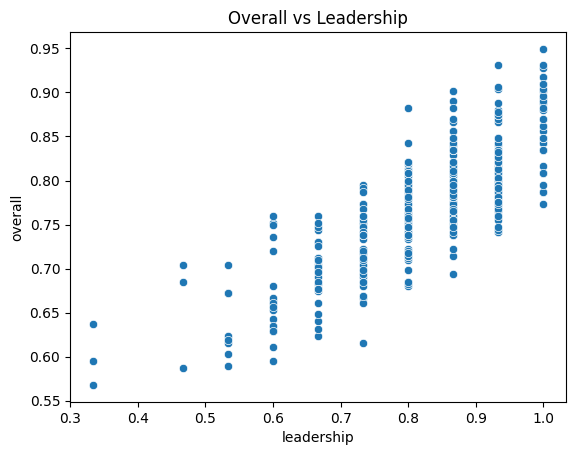

In [68]:
sns.scatterplot(data=df_numerical,x='leadership',y='overall')
plt.title('Overall vs Leadership')

Text(0.5, 1.0, 'Overall vs Leadership')

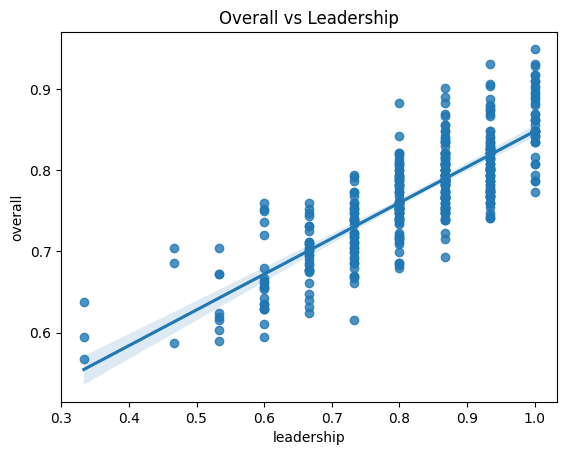

In [73]:
sns.regplot(data=df_numerical,x='leadership',y='overall')
plt.title('Overall vs Leadership')

### Checking for the Outliers

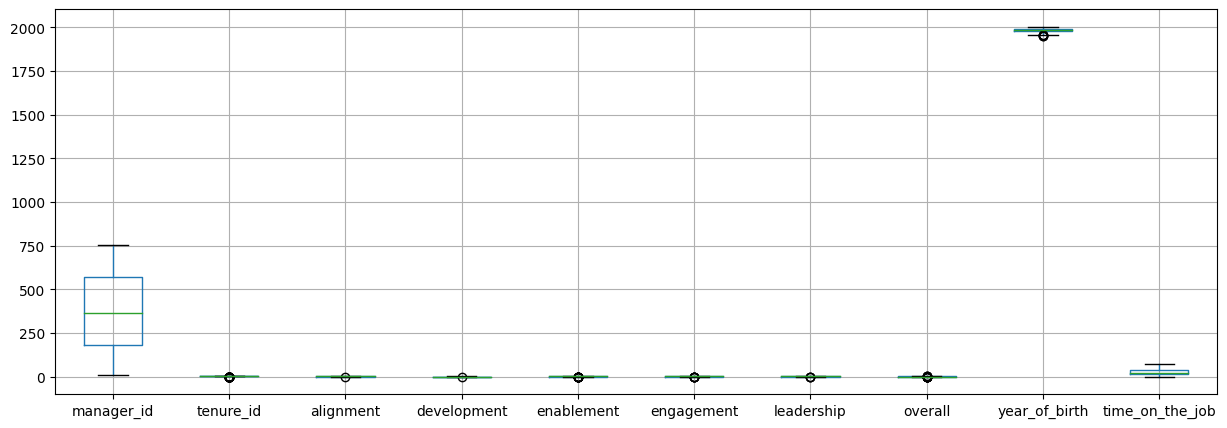

In [55]:
plt.figure(figsize=(15,5))
df_numerical.boxplot()
plt.show()

### Splitting in Features and Label

In [56]:
X_features = df.copy()
y_label = df[['overall']]

###  Data Preprocessing
- Data Encoding
- Data Standardization
- Feature and Label Prepared
- Train and Test split

### Data Encoding

In [58]:
encoder = OrdinalEncoder()
X_features_encoded = encoder.fit_transform(X_features)

### Data Standardization

In [60]:
scaler  = StandardScaler()
X_features_scaled = scaler.fit_transform(X_features_encoded)

### Feature and Label Prepared

In [62]:
X_prepared = pd.DataFrame(X_features_scaled,columns=X_features.columns)
y_prepared = y_label.copy()

### Train and Test Split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_prepared,y_prepared,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(304, 19) (77, 19)
(304, 1) (77, 1)


### `NOTE:` Data Preprocessing for Employee Satisfaction dataset has prepraed for End to End Machine learning project visit: www.github.com/itechdp